In [2]:
import os
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from  keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.applications import mobilenet_v2

In [3]:
loaded_model = tf.keras.models.load_model('MobiNet.h5')
print("Loaded model from Disk")

Loaded model from Disk


In [4]:
loaded_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])


NORMAL2-IM-1431-0001.jpeg


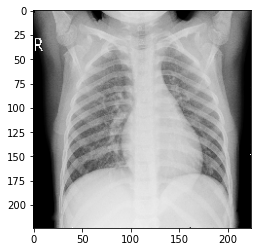

COVID:
1.1164610347336179e-07 %
NORMAL:
100.0 %


In [7]:
Test_path = 'Unknown'

Category = ['COVID','NORMAL']

input_path = 'Coviddataset/Train'

Target_path = 'Coviddataset/Val'

for i in os.listdir(Test_path):
    if i == 'Thumbs.db':
        break
    img = image.load_img(Test_path+'//'+i,target_size=(224,224),interpolation='nearest')

    img=tf.keras.preprocessing.image.img_to_array(img)

    print(i)
    
    plt.imshow(img/255.)
    
    plt.show()

    img = mobilenet_v2.preprocess_input(img)
    
    predictions=loaded_model.predict(np.array([img]))
    print('COVID:')
    Cov =predictions[0][0]

    print(Cov*100 ,'%')

    print('NORMAL:')

    Nor = predictions[0][1]

    print(Nor*100 , '%')
